# Lab. 7 - K-Means and the LLoyd algorithm

In this lab we consider the problem of **unsupervised learning**, through one of the most famous **clustering** algorithms: K-means.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.linalg as la
import scipy.spatial

In [2]:
def mixGauss(means, sigmas, n):
    means = np.array(means)
    sigmas = np.array(sigmas)

    d = means.shape[1]
    num_classes = sigmas.size
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(
            mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2, size=n)
        labels[idx * n:(idx + 1) * n] = idx 
        
    if(num_classes == 2):
        labels[labels == 0] = -1

    return data, labels

In [3]:
def all_distances(X1, X2):
    return scipy.spatial.distance.cdist(X1, X2, metric='sqeuclidean')

## Part 1. Implementing the LLoyd Algorithm

The Lloyd algorithm is the standard algorithm for implementing k-means. It is based on two steps
 1. Assigning each point to a cluster
 2. Updating the cluster centers
repeated iteratively until the cluster centers (and point assignments) have converged.

The function skeleton below takes as input the following arguments
 - `X` the data matrix
 - `centers` the initial cluster centers. This could be random, or as we will see in the second part, they could be initialized following a smarter strategy.
 - `maxiter` the maximum number of iterations of the algorithm.
 
The function returns
 - the final cluster centers
 - the assignment labels of each point to their cluster.

In [4]:
def lloyd(X, centers, maxiter):
    # X: n x d
    # centers : k x d
    n, d = X.shape
    k = centers.shape[0]
    
    for i in range(maxiter):
        # Compute Squared Euclidean distance (i.e. the squared distance)
        # between each cluster centre and each observation
        dist =  all_distances(X, centers)
        
        # Assign data to clusters: 
        # for each point, find the closest center in terms of euclidean distance
        c_asg = np.argmin(dist, axis=1)

        # Update cluster center
        for c in range(k):
            centers[c] = np.mean(X[c_asg == c], axis=0)
        
    return c_asg, centers

## Part 2. K-Means: Analysis

Here you should create a synthetic dataset using the `mixGauss` function **with four or more classes**.

You can experiment with different dataset creation strategies:
 - Create datasets where the classes are very well separated, then k-means should be able to infer the classes easily
 - Create datasets where the classes have overlap. In this case the k-means algorithm won't be able to distinguish the points of overlap. What do you think will happen?
 
Then, you should run the k-means algorithm with randomly initialized centers:
 1. Create the random centers **within the same range as your data**. You can use the `np.random.uniform` function for this.
 2. Run the Lloyd algorithm
 3. Plot the results.

##### Your Tasks
You should repeat this procedure multiple times, and comment on the following:
 1. Do you obtain the same clusters every time?
     If you obtain clusterings which are always the same, you can try to initialize two cluster centers at a very similar point. This will put the algorithm in a difficult situation!
     
 2. Why do the colors of a specific cluster seem to change at each iteration?
 3. Try using the *wrong* number of clusters `k` (wrong with respect to the number of classes you used to generate the data). What happens?

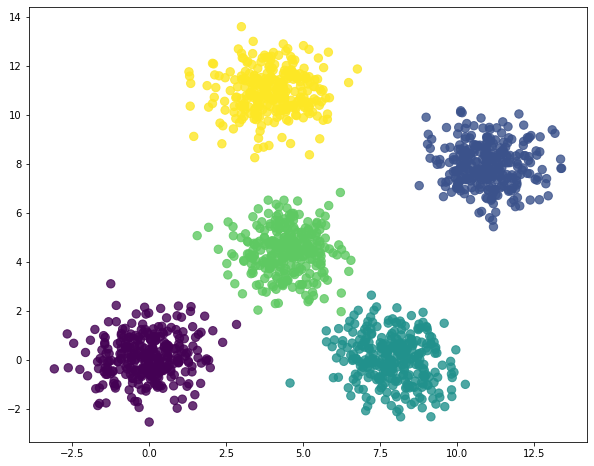

In [75]:
# Build a dataset with at least 4 classes in 2 dimensions, and plot it
num_classes = 5
means = [[0, 0], [11, 8], [8, 0], [4.5, 4.5], [4, 11]]
sigmas = [0.9, 0.9, 0.9, 0.9, 0.9]
points_per_class = 300
X, Y = mixGauss(means, sigmas, points_per_class)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8)
plt.show()

With this set of means we can already say that the algorithm will be able to infer to the correct classes solution.
However, by playing a little bit with the position of the classes, in the next part we will see how it will be much more difficult to distinguish the different classes.

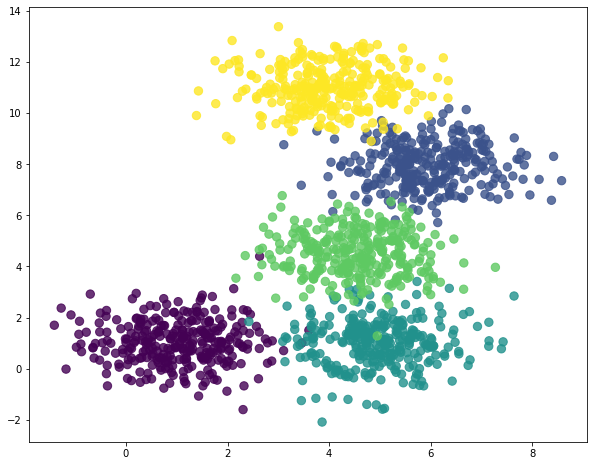

In [86]:
# Build a dataset with at least 4 classes in 2 dimensions, and plot it
num_classes = 5
means = [[1, 1], [6, 8], [5, 1], [4.5, 4.5], [4, 11]]
sigmas = [0.9, 0.9, 0.9, 0.9, 0.9]
points_per_class = 300
X, Y = mixGauss(means, sigmas, points_per_class)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8)
plt.show()

### Multiple run on the same dataset with the same number of clusters and classes but random centers (Using the second dataset)

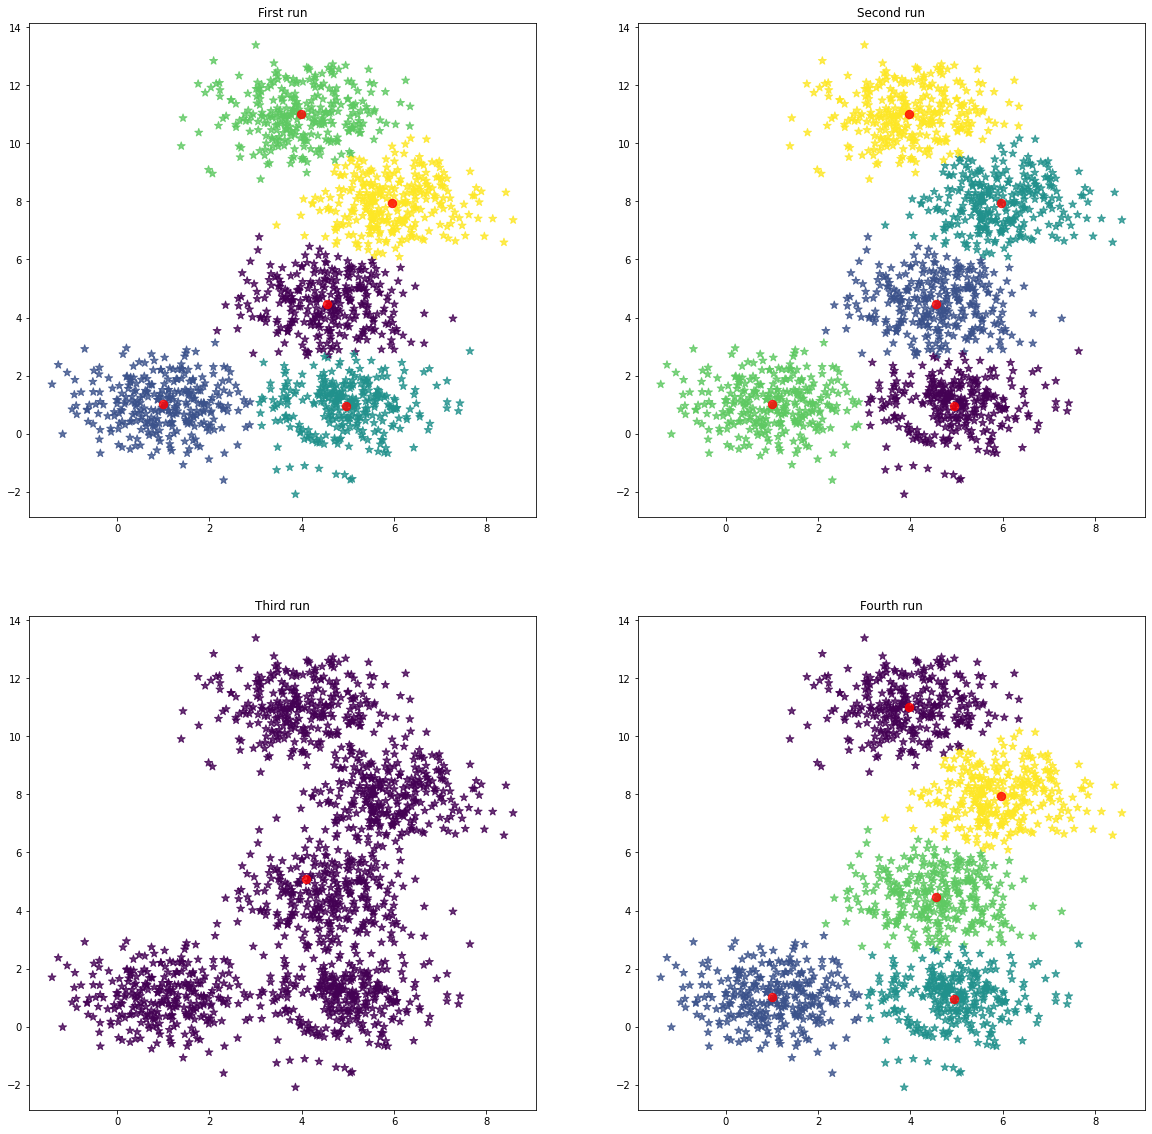

In [87]:
# Try with a random initialization of the centers.
k = num_classes
centers0 = np.random.uniform(low=np.amin(X, 0), high=np.amax(X, 0), size=(k, X.shape[1]))

# Call the lloyd function
Iv, centers = lloyd(X, centers0, 50)

# Visualize the final clusters and their centroids
f, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0,0].scatter(X[:,0], X[:,1], s=70, c=Iv, marker='*', alpha=0.8)
ax[0,0].scatter(centers[:,0], centers[:,1], s=70, c='red', alpha=0.8)
ax[0,0].set_title('First run')

# Second run
centers1 = np.random.uniform(low=np.amin(X, 0), high=np.amax(X, 0), size=(k, X.shape[1]))
Iv, centers = lloyd(X, centers1, 50)
ax[0,1].scatter(X[:,0], X[:,1], s=70, c=Iv, marker='*', alpha=0.8)
ax[0,1].scatter(centers[:,0], centers[:,1], s=70, c='red', alpha=0.8)
ax[0,1].set_title('Second run')

# Third run
centers2 = np.random.uniform(low=np.amin(X, 0), high=np.amax(X, 0), size=(k, X.shape[1]))
Iv, centers = lloyd(X, centers2, 50)
ax[1,0].scatter(X[:,0], X[:,1], s=70, c=Iv, marker='*', alpha=0.8)
ax[1,0].scatter(centers[:,0], centers[:,1], s=70, c='red', alpha=0.8)
ax[1,0].set_title('Third run')

# Fourth run
centers3 = np.random.uniform(low=np.amin(X, 0), high=np.amax(X, 0), size=(k, X.shape[1]))
Iv, centers = lloyd(X, centers3, 50)
ax[1,1].scatter(X[:,0], X[:,1], s=70, c=Iv, marker='*', alpha=0.8)
ax[1,1].scatter(centers[:,0], centers[:,1], s=70, c='red', alpha=0.8)
ax[1,1].set_title('Fourth run')

plt.show()
# NOTE: TRY MULTIPLE TIMES!

As we can see in the majority of the cases the algorithm is able to find the correct clusters, but sometimes it fails to do so.

Also it happens that the cluster position remains the same but the color changes, this is due to the fact that the algorithm is not deterministic and it depends on the initial centers.

In the most unlucky case the algorithm is not able to find the correct clusters, this is due to the fact that the initial centers are too close to each other and the algorithm is not able to distinguish them (like in the third run). 

### Different number of clusters and classes with random centers (Using the second dataset)

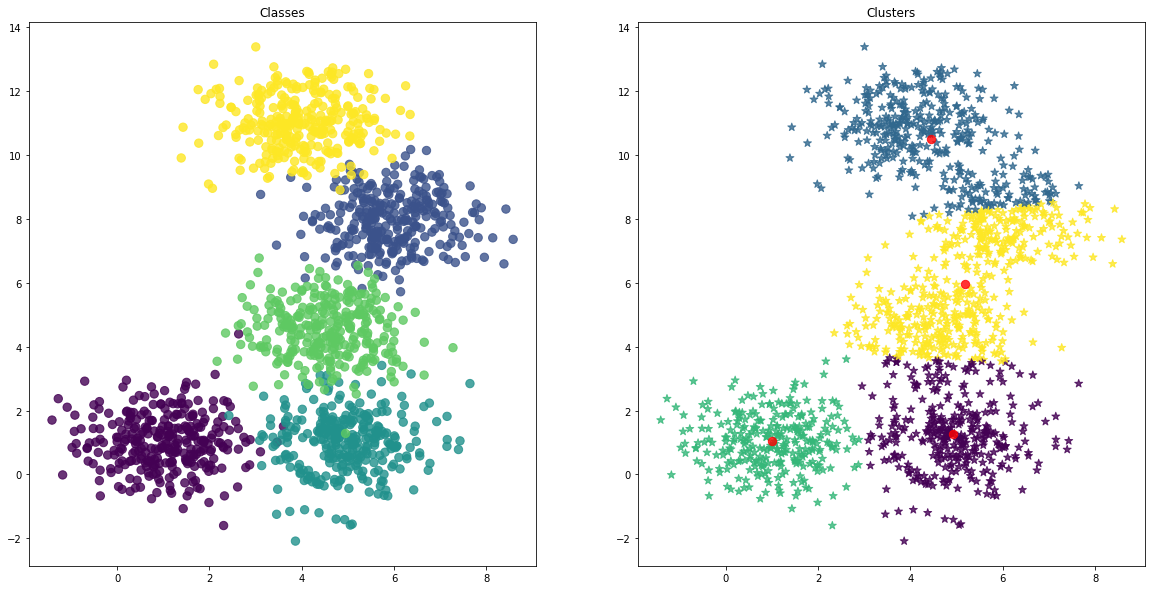

In [90]:
k = num_classes -1
centers5 = np.random.uniform(low=np.amin(X, 0), high=np.amax(X, 0), size=(k, X.shape[1]))

# Call the lloyd function
Iv, centers = lloyd(X, centers5, 10)

# subplot with the classes and the cluster
f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8)
ax[0].set_title('Classes')
ax[1].scatter(X[:,0], X[:,1], s=70, c=Iv, marker='*', alpha=0.8)
ax[1].scatter(centers[:,0], centers[:,1], s=70, c='red', alpha=0.8)
ax[1].set_title('Clusters')
plt.show()

Using a different number of clusters than the number of classes brings a centroid to the centre of two different classes

## Part 3. A Better Initialization Strategy: K-Means++

Initializing the cluster centers at random, sometimes makes the algorithm converge to a sub-optimal local minimum.

The k-means++ algorithm is an **initialization strategy** to generate the initial centers, which can then be passed to the lloyd algorithm.

K-means++ works by selecting the cluster centers as the points within the dataset which have the **maximum distance** between each other. To do this it uses a greedy strategy implemented in the `kmeanspp` function below.

Take a look at the K-Means++ function and then use it as initialization for the K-means algorithm.

##### Your task:
You should take a dataset on which K-Means was struggling, and apply K-Means++ for the center initialization, trying to show that the new initialization strategy improves the clustering algorithm.

In [5]:
def kmeanspp(X, k):
    n, d = X.shape

    IdxC = np.random.permutation(n)
    centers = np.zeros((k, d))

    # Select a random point in the dataset as the starting point
    centers[0, :] = X[IdxC[0], :]

    for i in range(1, k):
        D = all_distances(centers[:i, :], X)
        Ds = np.min(D, axis=0)  # This is the distance to the closest existing center

        # Probability of choosing new points as centers is weighted as the
        # squared distance to the closest existing center.
        D2 = Ds ** 2
        P = np.divide(D2, np.sum(D2))

        # Simply pick the point with the highest probability
        newcpos = np.argmax(P)
        centers[i,:] = X[newcpos, :]
    return centers

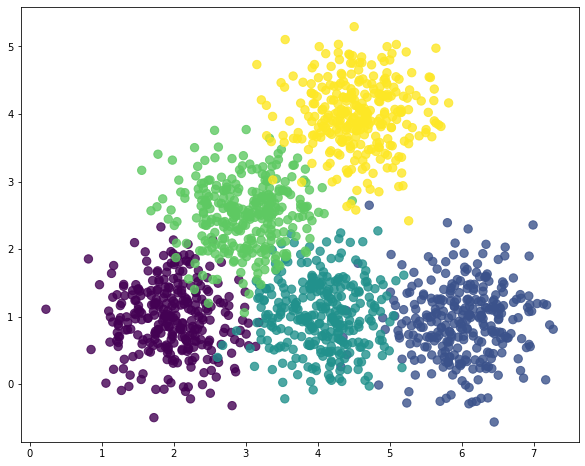

In [19]:
# Build a much more overlapped dataset with at least 4 classes in 2 dimensions, and plot it
num_classes = 5
means = [[2, 1], [6, 1], [4, 1], [3, 2.5], [4.5, 4]]
sigmas = [0.5, 0.5, 0.5, 0.5, 0.5]
points_per_class = 300
X, Y = mixGauss(means, sigmas, points_per_class)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8)
plt.show()

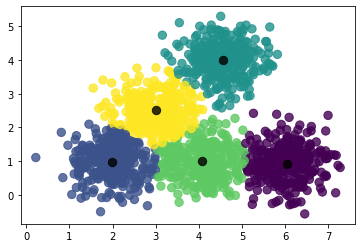

In [20]:
# Try and use K-Means++ for initialization
k = num_classes
centers7 = kmeanspp(X, k)

# Call the Lloyd function
Iv, centers =  lloyd(X, centers7, 50)

# Visualize the final clusters and their centroids
plt.scatter(X[:,0], X[:,1], s=70, c=Iv, alpha=0.8)
plt.scatter(centers[:,0], centers[:,1], s=70, c='k', alpha=0.8)

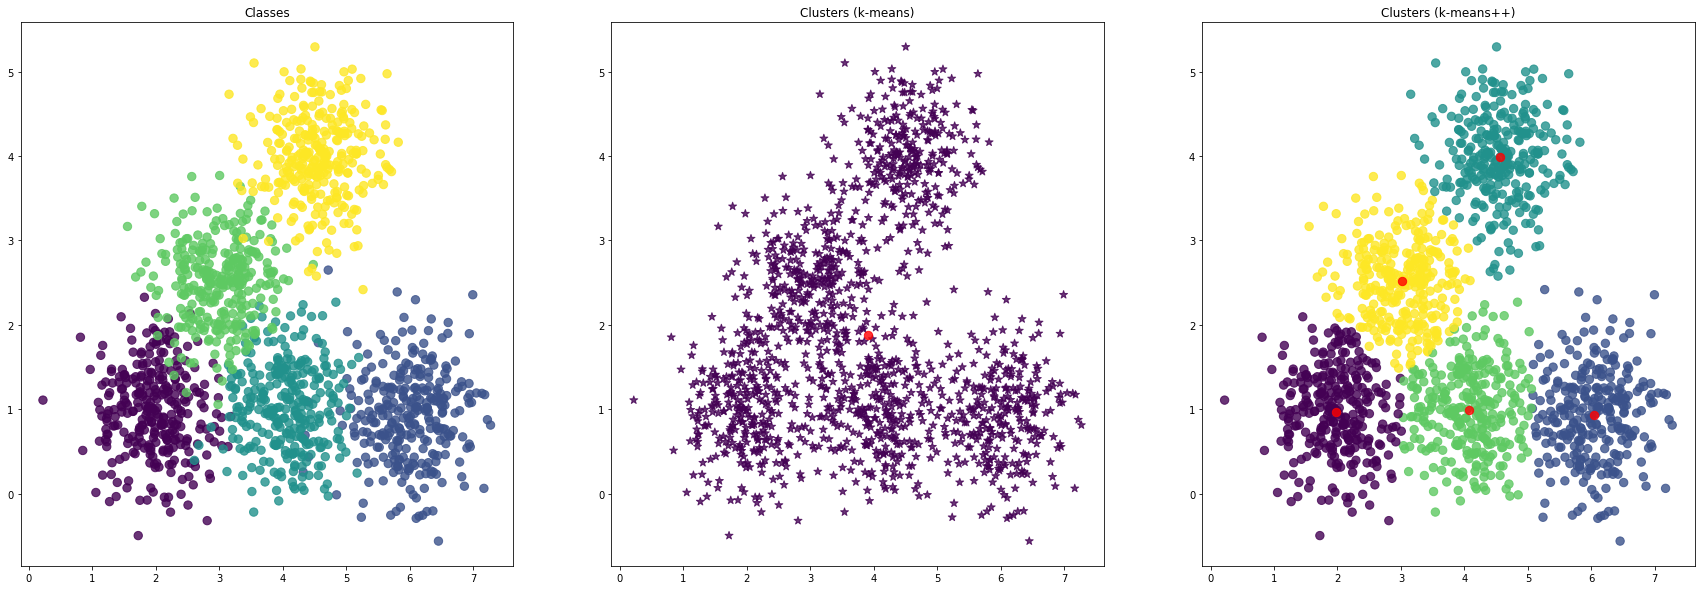

In [43]:
# Use normal k-means to cluster the data
k = num_classes
centers6 = np.random.uniform(low=np.amin(X, 0), high=np.amax(X, 0), size=(k, X.shape[1]))
Iv, centers = lloyd(X, centers6, 50)

# Use k-means++ to cluster the data
centers7 = kmeanspp(X, k)
Iv_plus, centers_plus = lloyd(X, centers7, 50)

# subplot with the classes and the cluster
f, ax = plt.subplots(1, 3, figsize=(30,10))
ax[0].scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8)
ax[0].set_title('Classes')
ax[1].scatter(X[:,0], X[:,1], s=70, c=Iv, marker='*', alpha=0.8)
ax[1].scatter(centers[:,0], centers[:,1], s=70, c='red', alpha=0.8)
ax[1].set_title('Clusters (k-means)')
ax[2].scatter(X[:,0], X[:,1], s=70, c=Iv_plus, alpha=0.8)
ax[2].scatter(centers_plus[:,0], centers_plus[:,1], s=70, c='red', alpha=0.8)
ax[2].set_title('Clusters (k-means++)')
plt.show()

After some runnings, the result above shows the "unlucky" case of initialization of k-means where it is not able to find the correct clusters. While for the k-means++ this never happens.

In general, as we can see the k-means++ algorithm is able to find a better solution than the random inizialization.